# Overview

__lightning__ is a library for large-scale linear classification, regression, and ranking in Python and has several solvers for each category.

Here are a list of things it can be used for (more details can be found in the documentation website linked below):
- Primal coordinate descent
- Dual coordinate ascent
- FISTA (Fast Iterative Shrinkage-Thresholding Algorithm)
- Stochastic gradient method
- AdaGrad
- Stochastic average gradient
- Stochastic variance-reduced gradient
- PRank

It's dependencies include:
- Python ( >= 3.7)
- setuptools
- Joblib
- Numpy ( >= 1.12)
- SciPy ( >= 0.19)
- scikit-learn ( >= 0.19)
- Cython
- Working C/C++ compiler
- Pytest

It can be easily installed using pip or conda (see the Github website below for more details)

Documentation website: https://contrib.scikit-learn.org/lightning/intro.html

Github website: https://github.com/scikit-learn-contrib/lightning



# Example: Robust regression

Note: This came from an example in the documentation website

In [ ]:
print(__doc__)

import numpy as np
import pylab as pl

from sklearn.datasets import make_regression
from sklearn.utils import check_random_state
from sklearn.linear_model import Ridge

from lightning.regression import LinearSVR

# Generate regression data.
X_train, y_train = make_regression(n_samples=15, n_features=1,
                                   n_informative=1, random_state=0)

# Add noise.
rs = check_random_state(0)
y_train += rs.normal(np.std(y_train), size=X_train.shape[0])
# Add an outlier.
y_train[5] *= 5

X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

pl.figure()
pl.scatter(X_train.ravel(), y_train)

reg = Ridge(alpha=1e-1)
reg.fit(X_train, y_train)
pl.plot(X_test.ravel(), reg.predict(X_test), label="Ridge")

# LinearSVR is equivalent to absolute-loss regression (robust regression)
# when epsilon=0.
reg = LinearSVR(C=10, epsilon=0, fit_intercept=True, random_state=0)
reg.fit(X_train, y_train)
pl.plot(X_test.ravel(), reg.predict(X_test), label="Robust")

pl.legend(loc="upper left")

pl.show()

If everything turned out well then you should get this image after running the code

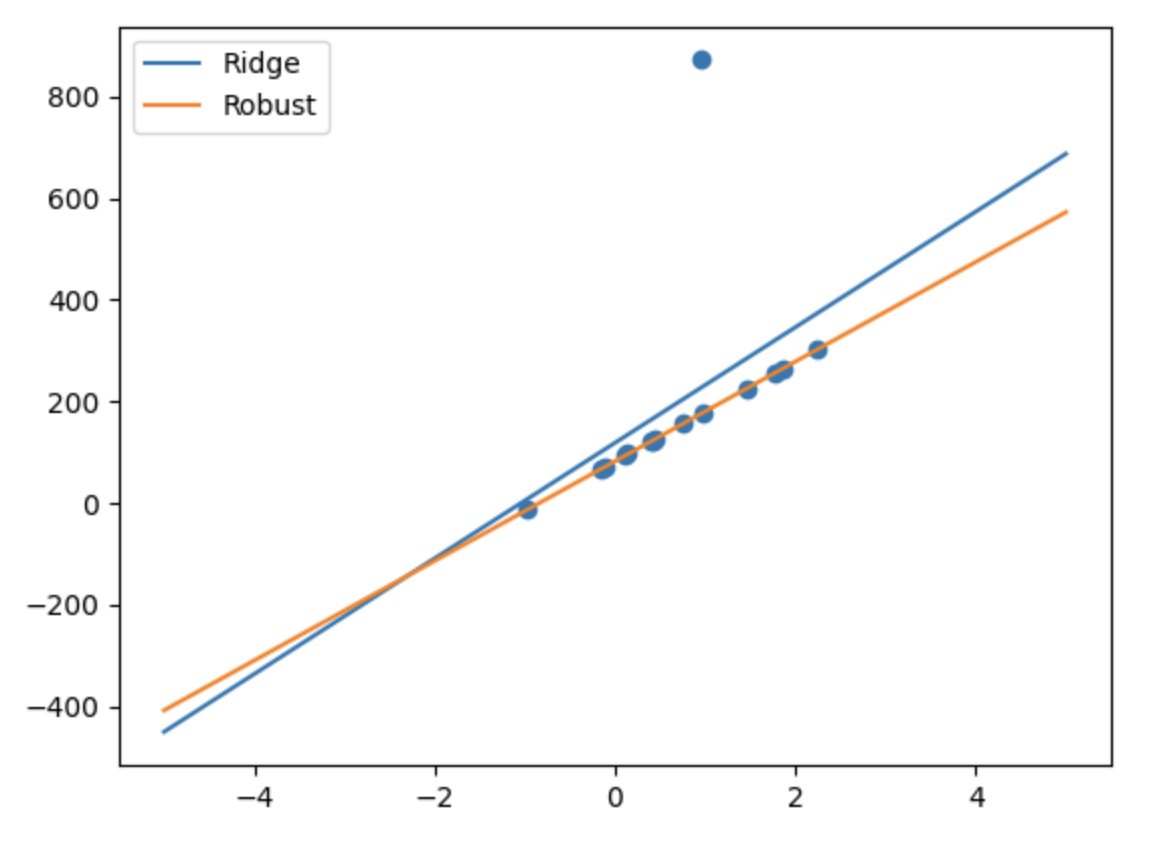

# Project Idea

Since the library has many gradient related tools, I think it would be cool to do something where we compare how well each of these tools do based on accuracy, performance, percision, etc.